<a href="https://colab.research.google.com/github/Aqsaafk/Scifor/blob/main/DeepLearningModel_SciforAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning Model

Deep learning is a subset of machine learning that focuses on training artificial neural networks with multiple layers to learn from data and make predictions or decisions. These models are inspired by the structure and function of the human brain, where interconnected neurons process information. Deep learning has gained popularity due to its ability to automatically discover and represent complex patterns in data, leading to state-of-the-art performance in various tasks such as image recognition, natural language processing, and more.

##Handwritten Digit Recognition Model

In our example, we've built a deep learning model for recognizing handwritten digits using the MNIST dataset. This model is a type of artificial neural network known as a convolutional neural network (CNN), which is particularly effective for image-related tasks.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


Training set shape: (60000, 28, 28)


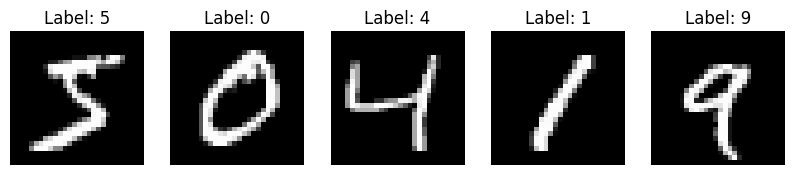

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training set shape:", x_train.shape)

# Print a few examples from the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')
plt.show()

##Load and Preprocess Data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

##Compiling the Model

Compiling the model with appropriate loss function and optimizer.


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model

In [5]:
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1436 - accuracy: 0.9560 - val_loss: 0.0503 - val_accuracy: 0.9834
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0311 - val_accuracy: 0.9914


##Evaluating the Model

In [6]:
test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print("Test accuracy:", test_accuracy)


313/313 [==============================] - 2s 8ms/step - loss: 0.0311 - accuracy: 0.9914
Test accuracy: 0.9914000034332275


##Visualizing training history

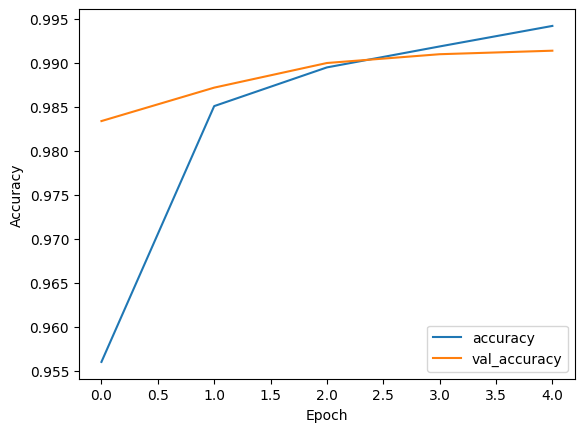

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()